# Classes of Peaks based on ATAC signal

Can one define different classes of peaks based on the signal and the signal variation across cells?

Can one cluster CREs based on their ATAC-signal?

Can one visualize the behaviour of clustered regions?

Can one define cell lineage specific CRE clusters?

Are there differences between these cell-lineage specific CRE clusters? When and how long are they active?

### Import of Packages and Data Prep

In [4]:
import importlib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats
import sklearn.manifold as sklm
import os
from sklearn.decomposition import PCA
from matplotlib.colors import LogNorm
import scanpy as sc
import umap
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import anndata as ad

import functions

importlib.reload(functions)
functions.set_user('Laila')

data = functions.call_data_clean()
ATAC = data['ATAC_seq']
ATAC_scores = data['norm_scores']
exons = data['exons']
ATACtest = data['test1']
ATAC_dis = pd.read_csv("ATAC_dis_annotated.csv", header=0, index_col=0)
score_cols_all = list(data['norm_scores'].columns)
abgd = data['list_ATAC_Tc_ab_gd']
top2500 = data['top2500std']

/opt/anaconda3/envs/bioinfo_base/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
scores_TC = ATAC_scores[abgd]

scores_df = ATAC_scores.copy()
QC = data['QC_metrics']

In [8]:
scores_TC

,preT.DN1.Th,preT.DN2a.Th,preT.DN2b.Th,preT.DN3.Th,T.DN4.Th,T.ISP.Th,T.DP.Th,T.4.Th,T.8.Th,T.4.Nve.Sp,...,Treg.4.FP3+.Nrplo.Co,Treg.4.25hi.Sp,NKT.Sp,Tgd.g2+d17.24a+.Th,Tgd.g2+d17.LN,Tgd.g2+d1.24a+.Th,Tgd.g2+d1.LN,Tgd.g1.1+d1.24a+.Th,Tgd.g1.1+d1.LN,Tgd.Sp
ImmGenATAC1219.peakID,,,,,,,,,,,,,,,,,,,,,
ImmGenATAC1219.peak_1,0.075335,0.459350,0.320586,0.309429,0.359605,0.075627,0.407916,0.075723,0.616796,1.366071,...,0.655875,0.546636,0.350270,0.561244,0.090690,0.365397,1.218284,0.075520,1.066322,1.067027
ImmGenATAC1219.peak_2,0.459682,0.459350,0.297861,0.816877,0.582865,0.075627,0.439390,0.531878,0.332727,0.495996,...,0.566062,1.234269,0.566473,0.561244,0.515212,0.455531,0.083253,0.075520,0.594785,1.067027
ImmGenATAC1219.peak_3,0.256925,0.459350,0.075424,0.068767,0.227520,0.332631,0.610446,0.075723,0.075650,0.997421,...,0.150702,0.546636,0.350270,0.333231,0.515212,0.455531,0.083253,0.075520,0.075832,0.782584
ImmGenATAC1219.peak_4,0.291802,0.075273,0.297861,0.068767,0.359605,0.075627,0.114915,1.037935,0.332727,0.687559,...,0.150702,0.546636,1.265100,0.333231,0.090690,0.191153,0.429242,0.075520,0.075832,0.323750
ImmGenATAC1219.peak_5,0.459682,0.494678,0.725792,0.867940,0.221494,0.545874,0.257114,0.252248,0.338323,0.943479,...,0.150702,0.316192,0.832066,1.350036,0.448187,0.825287,0.083253,0.747675,0.571158,0.323750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ImmGenATAC1219.peak_512591,1.388417,1.792346,1.402874,1.687643,2.351792,1.971178,1.905284,2.360298,1.345775,2.095107,...,1.637887,2.308869,2.447756,2.430988,2.458555,3.405292,2.991910,2.380291,2.922987,1.475495
ImmGenATAC1219.peak_512592,1.451473,1.927751,2.319374,2.603421,3.098440,3.059010,0.946099,1.974385,1.829754,1.099605,...,2.122119,2.082201,2.073567,2.667555,2.895894,3.102970,2.354383,2.817265,2.755955,1.452276
ImmGenATAC1219.peak_512593,0.454561,0.955864,0.510443,0.816877,0.465386,1.256708,0.407916,0.974606,1.359599,0.943479,...,1.556762,1.234269,0.350270,1.341688,0.797951,0.611285,0.699326,0.713696,0.843829,1.310271


### Peak Means and Variances

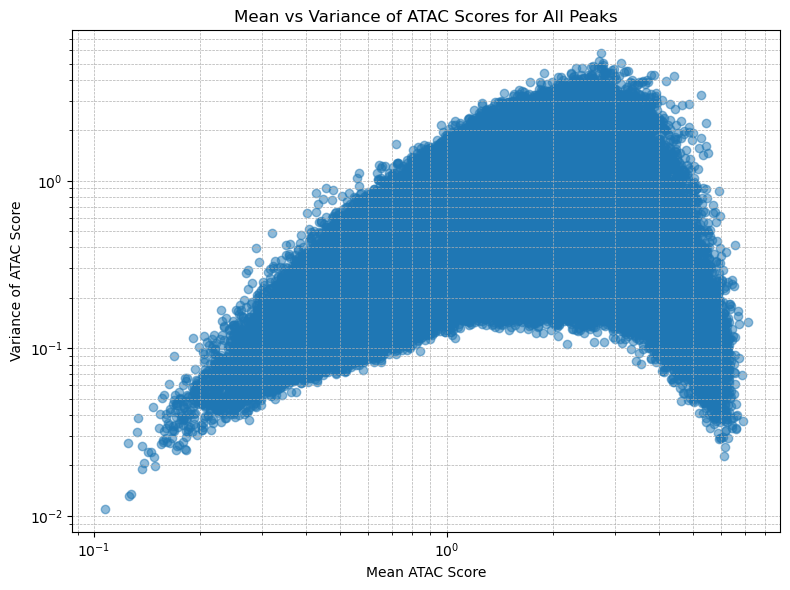

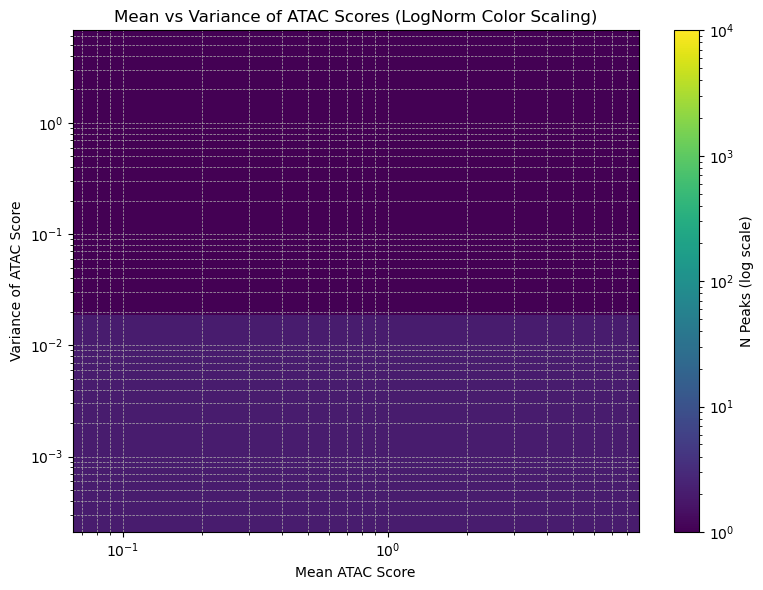

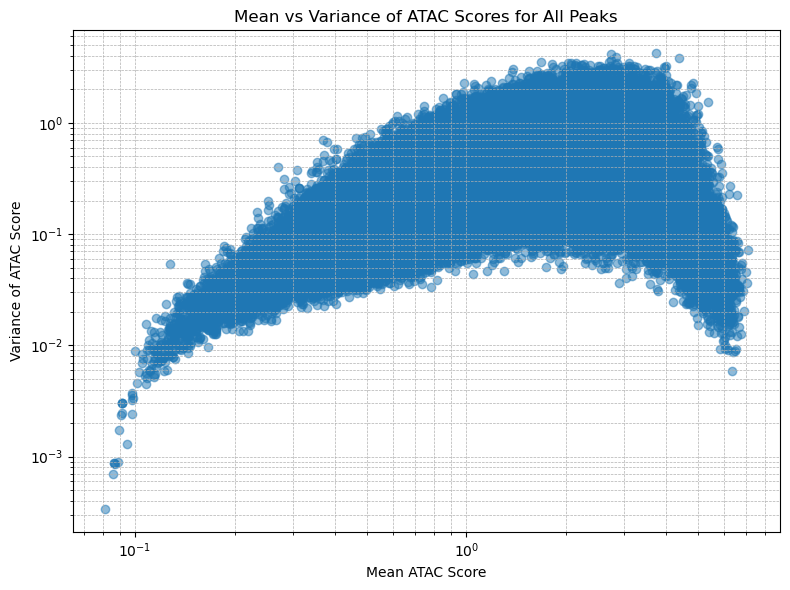

In [9]:
# calculate mean and variance of ATAC scores for each peak (and for the subset)

#full df
peak_means = scores_df.mean(axis=1)
peak_vars = scores_df.var(axis=1)

#subset df
peak_means_TC = scores_TC.mean(axis=1)
peak_vars_TC = scores_TC.var(axis=1)

# plot mean vs variance for all peaks
plt.figure(figsize=(8, 6))
plt.scatter(peak_means, peak_vars, alpha=0.5)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Mean ATAC Score')
plt.ylabel('Variance of ATAC Score')
plt.title('Mean vs Variance of ATAC Scores for All Peaks')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()



plt.figure(figsize=(8, 6))

hb = plt.hexbin(
    peak_means_TC,
    peak_vars_TC,
    gridsize=75,
    cmap='viridis',
    norm=LogNorm(vmin=1, vmax=10000),  # use your actual max bin count
    mincnt=1
)

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Mean ATAC Score')
plt.ylabel('Variance of ATAC Score')
plt.title('Mean vs Variance of ATAC Scores (LogNorm Color Scaling)')
plt.colorbar(hb, label='N Peaks (log scale)')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(peak_means_TC, peak_vars_TC, alpha=0.5)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Mean ATAC Score')
plt.ylabel('Variance of ATAC Score')
plt.title('Mean vs Variance of ATAC Scores for All Peaks')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()


### Select Peaks to analyze

high mean --> high accessibility

high variance --> important for differentiation


In [10]:
print("Peak mean min/max:", peak_means.min(), peak_means.max())
print("Peak var min/max:", peak_vars.min(), peak_vars.max())

print("Percentiles (mean):", np.percentile(peak_means, [1, 10, 50, 90, 99]))
print("Percentiles (var):", np.percentile(peak_vars, [1, 10, 50, 90, 99]))


Peak mean min/max: 0.10721181183458568 7.151651900924435
Peak var min/max: 0.010947812898344133 5.772345349157312
Percentiles (mean): [0.35702703 0.50680374 0.77860762 1.92607152 4.30277577]
Percentiles (var): [0.09107623 0.13906765 0.25035093 0.76369023 1.93764175]


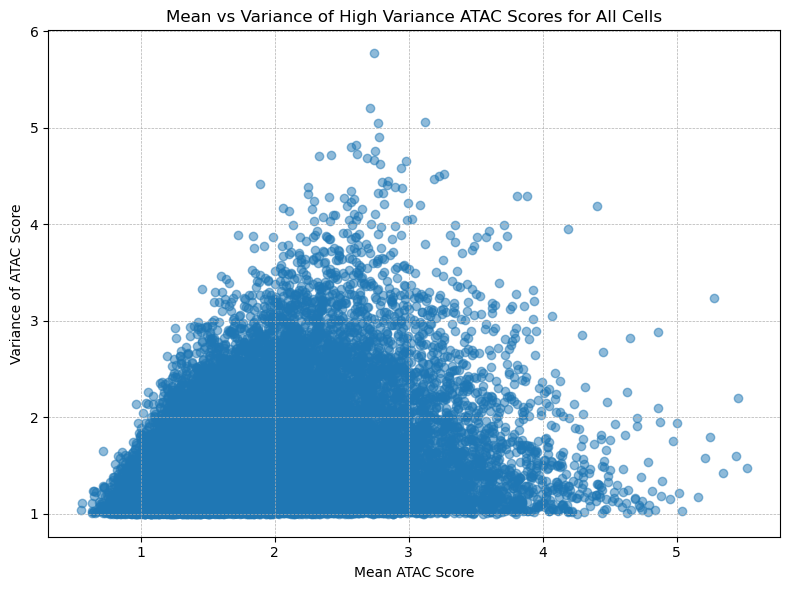

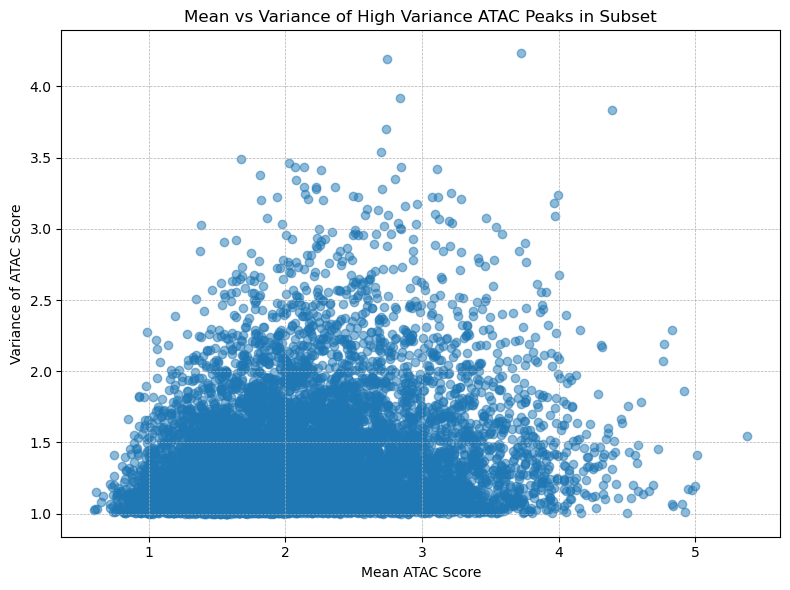

(31251, 90)
(9627, 22)


In [11]:
#extract peaks with high variance (--> more significant for differentiation)
high_variance_peaks = ATAC_scores[peak_vars > 1]

high_variance_peaks_TC = scores_TC[peak_vars_TC > 1]

# plot mean vs variance for high variance peaks
plt.figure(figsize=(8, 6))
plt.scatter(high_variance_peaks.mean(axis=1), high_variance_peaks.var(axis=1), alpha=0.5)
plt.xlabel('Mean ATAC Score')
plt.ylabel('Variance of ATAC Score')
plt.title('Mean vs Variance of High Variance ATAC Scores for All Cells')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# plot mean vs variance for high variance peaks
plt.figure(figsize=(8, 6))
plt.scatter(high_variance_peaks_TC.mean(axis=1), high_variance_peaks_TC.var(axis=1), alpha=0.5)
plt.xlabel('Mean ATAC Score')
plt.ylabel('Variance of ATAC Score')
plt.title('Mean vs Variance of High Variance ATAC Peaks in Subset')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

print(high_variance_peaks.shape)
print(high_variance_peaks_TC.shape)

## Peak Clustering

### Number of Clusters

In [12]:
# z-Scaling

# subset cells
scaled_TC = StandardScaler().fit_transform(high_variance_peaks_TC)

# all cells
scaled = StandardScaler().fit_transform(high_variance_peaks)

##### Elbow Method

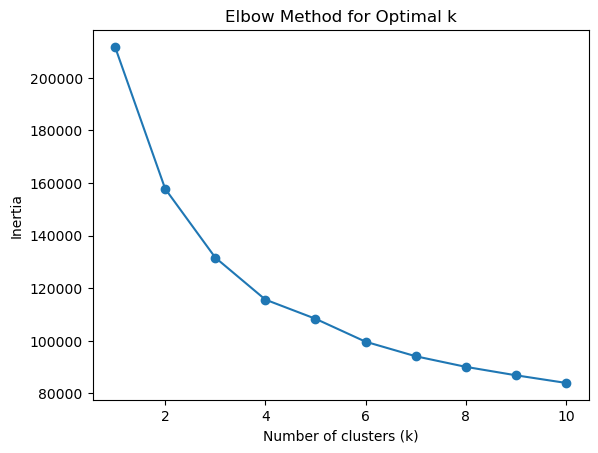

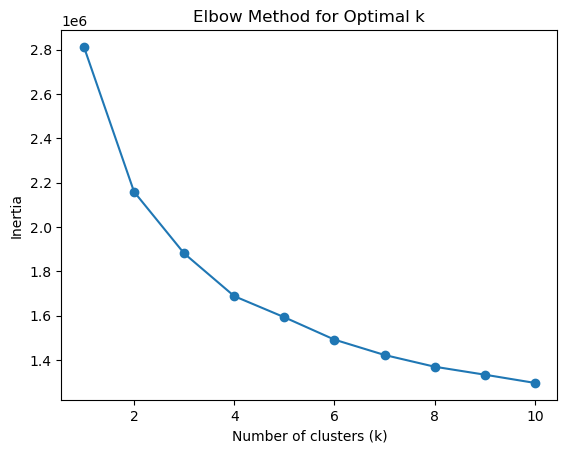

In [13]:
# subset
inertia = []
K_range = range(1, 11)


for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_TC)
    inertia.append(kmeans.inertia_)

plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# all cells
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled)
    inertia.append(kmeans.inertia_)

plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

If anything, maybe 2 as the "elbow"

##### Silhouette Score

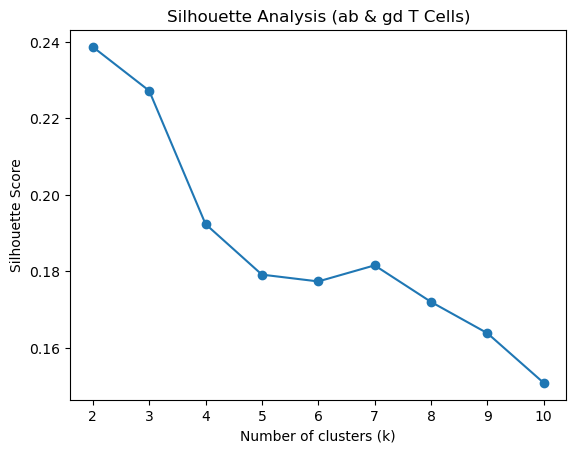

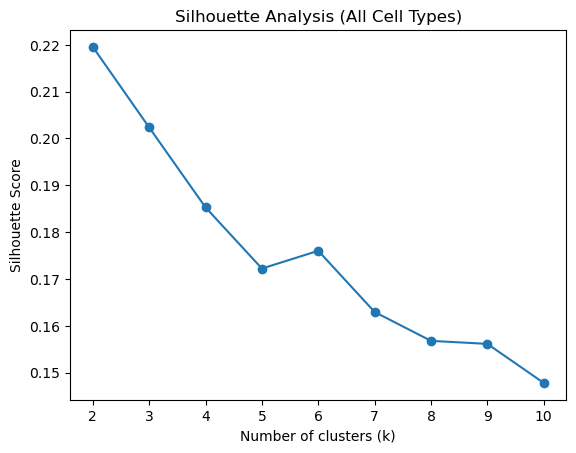

In [14]:
# subset
silscores_TC = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels_TC = kmeans.fit_predict(scaled_TC)
    score_TC = silhouette_score(scaled_TC, labels_TC)
    silscores_TC.append(score_TC)

plt.plot(range(2, 11), silscores_TC, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis (ab & gd T Cells)')
plt.show()

# all cells
silscores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled)
    score = silhouette_score(scaled, labels)
    silscores.append(score)

plt.plot(range(2, 11), silscores, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis (All Cell Types)')
plt.show()


### Actual Clustering and Heatmap

/var/folders/hf/p924smkx04g4y9vl6kh5yy4r0000gn/T/ipykernel_98433/2522886434.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_variance_peaks_TC['cluster'] = kmeans.fit_predict(scaled_TC)


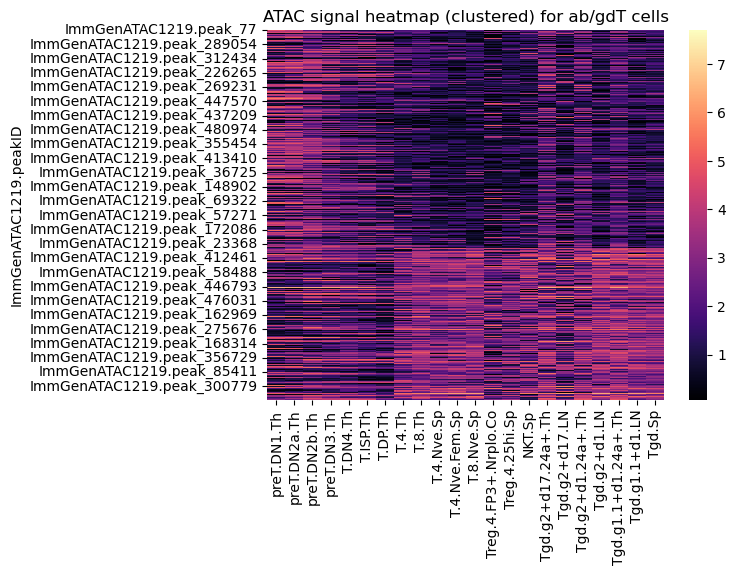

In [15]:
# subset
kmeans = KMeans(n_clusters=2, random_state=42)
high_variance_peaks_TC['cluster'] = kmeans.fit_predict(scaled_TC)

sorted_TC = high_variance_peaks_TC.sort_values('cluster')
sns.heatmap(sorted_TC.iloc[:, :-1], cmap='magma')
plt.title("ATAC signal heatmap (clustered) for ab/gdT cells")
plt.savefig("clustered_ATAC_peaks_TC.png")
plt.show()



cluster of peaks: 
1 --> more accessible in late differentiation
2 --> 

/var/folders/hf/p924smkx04g4y9vl6kh5yy4r0000gn/T/ipykernel_98433/1826635009.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_variance_peaks['cluster'] = kmeans.fit_predict(scaled)


Text(0.5, 1.0, 'ATAC signal heatmap (clustered)')

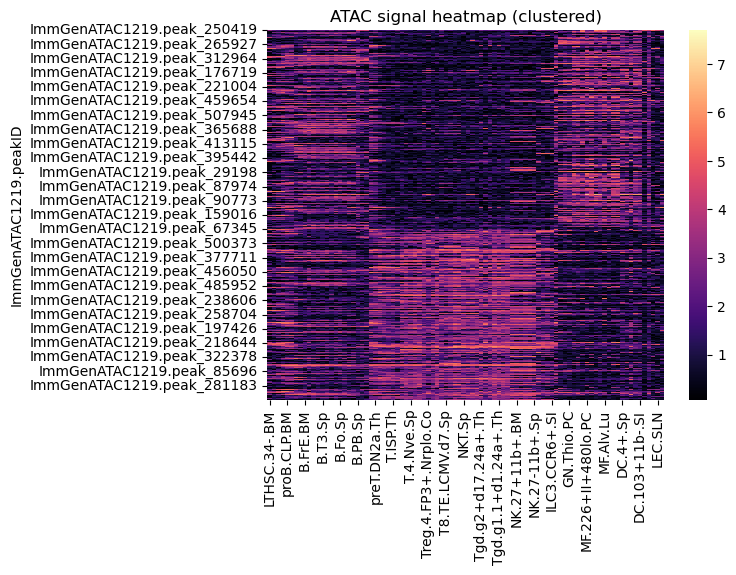

In [16]:
#all cells 
kmeans = KMeans(n_clusters=2, random_state=42)
high_variance_peaks['cluster'] = kmeans.fit_predict(scaled)

sorted_df = high_variance_peaks.sort_values('cluster')
sns.heatmap(sorted_df.iloc[:, :-1], cmap='magma')
plt.title("ATAC signal heatmap (clustered)")

peak clusters differ in accessibility in T and NK vs in other cells (Stem/Prog, myeloid etc.).

In [17]:
print("Peaks active in early differentiation of T cells:")
early_diff_peaks_TC = high_variance_peaks_TC[high_variance_peaks_TC['cluster'] == 0].index.tolist()
print(early_diff_peaks_TC)
print("Peaks active in late differentiation of T cells:")
late_diff_peaks_TC = high_variance_peaks_TC[high_variance_peaks_TC['cluster'] == 1].index.tolist()
print(late_diff_peaks_TC)

print("Peaks active in T and NK cells:")
peaks_TNK = high_variance_peaks[high_variance_peaks['cluster'] == 0].index.tolist()
print(peaks_TNK)
print("Peaks active in B, myeloid, Progenitor, Stem Cells, etc. ")
peaks_other = high_variance_peaks[high_variance_peaks['cluster'] == 1].index.tolist()
print(peaks_other)


Peaks active in early differentiation of T cells:
['ImmGenATAC1219.peak_77', 'ImmGenATAC1219.peak_96', 'ImmGenATAC1219.peak_126', 'ImmGenATAC1219.peak_137', 'ImmGenATAC1219.peak_326', 'ImmGenATAC1219.peak_443', 'ImmGenATAC1219.peak_736', 'ImmGenATAC1219.peak_804', 'ImmGenATAC1219.peak_823', 'ImmGenATAC1219.peak_836', 'ImmGenATAC1219.peak_872', 'ImmGenATAC1219.peak_1062', 'ImmGenATAC1219.peak_1253', 'ImmGenATAC1219.peak_1255', 'ImmGenATAC1219.peak_1367', 'ImmGenATAC1219.peak_1388', 'ImmGenATAC1219.peak_1574', 'ImmGenATAC1219.peak_1662', 'ImmGenATAC1219.peak_1666', 'ImmGenATAC1219.peak_1926', 'ImmGenATAC1219.peak_1966', 'ImmGenATAC1219.peak_1969', 'ImmGenATAC1219.peak_2084', 'ImmGenATAC1219.peak_2086', 'ImmGenATAC1219.peak_2089', 'ImmGenATAC1219.peak_2090', 'ImmGenATAC1219.peak_2143', 'ImmGenATAC1219.peak_2165', 'ImmGenATAC1219.peak_2170', 'ImmGenATAC1219.peak_2272', 'ImmGenATAC1219.peak_2364', 'ImmGenATAC1219.peak_2415', 'ImmGenATAC1219.peak_3051', 'ImmGenATAC1219.peak_3056', 'ImmGenATA

In [18]:
# clustering and heatmap of peaks in TNK cluster with focus on T cell subset

kmeans = KMeans(n_clusters=2, random_state=42)
peaks_TNK_df = high_variance_peaks.loc[peaks_TNK]

peaks_TNK_df['cluster'] = kmeans.fit_predict(scaled)

sorted_TNK = high_variance_peaks.sort_values('cluster')
sns.heatmap(sorted_df.iloc[:, :-4], cmap='magma')
plt.title("ATAC signal heatmap (clustered)")

ValueError: Length of values (31251) does not match length of index (16796)

In [19]:
info_early_diff_TC = ATAC_dis.loc[early_diff_peaks_TC]
info_late_diff_TC = ATAC_dis.loc[late_diff_peaks_TC]

##### Identity of Peaks within Clusters

mostly enhancers (over 300bp from TSS), even 

## UMAP and leiden Clustering of significant Peaks

#### TC Subset Dimension Reduction

In [21]:
# umap embedding
umap_model_TC = umap.UMAP(n_neighbors=15, min_dist=0.1, metric='euclidean', random_state=42)

# just use numeric data for UMAP
data_TC = high_variance_peaks_TC.select_dtypes(include=['number']).dropna()

# exclude metadata columns for embedding
umap_embedding_TC = umap_model_TC.fit_transform(data_TC)  

# Create a DataFrame for the UMAP embedding
data_red_TC = pd.DataFrame(umap_embedding_TC, columns=['UMAP1', 'UMAP2'])




/opt/anaconda3/envs/bioinfo_base/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


##### Leiden Clustering of Dim Red Data

In [22]:
# AnnData object
adata = ad.AnnData(data_TC)

# Compute neighbors and run Leiden clustering
sc.pp.neighbors(adata, n_neighbors=15, use_rep='X')
sc.tl.leiden(adata, resolution=1.0)  # adjust resolution as needed

# Add the Leiden cluster labels to your UMAP DataFrame
data_red_TC['leiden'] = adata.obs['leiden'].values

plt.figure(figsize=(10, 7))
sns.scatterplot(
    x='UMAP1', y='UMAP2', 
    hue='leiden',
    data=data_red_TC, 
    palette='tab20', 
    s=10, alpha=0.9
)
plt.title('UMAP of High-Variance Peaks Colored by Leiden Cluster (T cell subset)')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.legend(title='Leiden Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('leiden_peaks_TC.png', )
plt.show()

score_TC = silhouette_score(data_TC, data_red_TC['leiden'])
print(f"Silhouette Score: {score_TC:.3f}")


/opt/anaconda3/envs/bioinfo_base/lib/python3.13/site-packages/anndata/utils.py:311: UserWarning: X converted to numpy array with dtype float64
  warnings.warn(f"{name} converted to numpy array with dtype {arr.dtype}")


ImportError: Please install the leiden algorithm: `conda install -c conda-forge leidenalg` or `pip3 install leidenalg`.

## dominant lineage per peak

In [23]:
scores_t = ATAC_scores.T

scores_t.index.name = 'CellType'

#subset qc dataframe to add only lineage, cell family and organ information
QC_subset = QC[['CellType', 'Lineage', 'CellFamily', 'Organ']].drop_duplicates(subset='CellType', keep='first').reset_index(drop=True)

#merge ATAC dataframe with QC subset, drop duplicate Celltype rows from QC and reset index (combined)
ATAC_w_info = scores_t.merge(QC_subset, on='CellType', how='left').reset_index(drop=True)

#print NaN rows
ATAC_w_info[ATAC_w_info.isna().any(axis=1)]

ATAC_w_info.at[85, 'CellFamily'] = 'Fibroblastic reticular cell'
ATAC_w_info.at[85, 'Lineage'] = 'stroma'
ATAC_w_info.at[85, 'Organ'] = 'skin draining Lymph Node'

In [24]:
celltype_to_lineage = QC.set_index('CellType')['Lineage']
lineages = celltype_to_lineage.unique()

# DataFrame für die Mittelwerte anlegen
mean_per_lineage = pd.DataFrame(index=ATAC_scores.index)

# Für jede Lineage die zugehörigen CellTypes filtern und Mittelwert berechnen
for lin in lineages:
    celltypes = celltype_to_lineage[celltype_to_lineage == lin].index
    celltypes = [ct for ct in celltypes if ct in ATAC_scores.columns]
    mean_per_lineage[lin] = ATAC_scores[celltypes].mean(axis=1)

# 4. Dominante Lineage für jeden Peak bestimmen
mean_per_lineage['dominant_lineage'] = mean_per_lineage.idxmax(axis=1)
ATAC_dis['dominant_lineage'] = mean_per_lineage['dominant_lineage']

display(ATAC_dis)

,chrom,Summit,mm10.60way.phastCons_scores,_-log10_bestPvalue,Included.in.systematic.analysis,TSS,genes.within.100Kb,LTHSC.34-.BM,LTHSC.34+.BM,STHSC.150-.BM,...,variability,min,max,range,skewness,region_type,TSS_bin,gene_context,distal_enhancer_status,dominant_lineage
ImmGenATAC1219.peakID,,,,,,,,,,,,,,,,,,,,,
ImmGenATAC1219.peak_1,chr1,3020786,0.00,0.56,NaN,NaN,NaN,0.271312,0.428712,0.525201,...,0.754483,0.068554,1.826570,1.758017,0.939303,Enhancer,>20k,upstream,distal_enhancer,ILC
ImmGenATAC1219.peak_2,chr1,3087226,0.00,0.50,NaN,NaN,NaN,0.271312,0.847423,0.525201,...,0.766608,0.068630,1.541715,1.473084,0.839625,Enhancer,>20k,upstream,distal_enhancer,stroma
ImmGenATAC1219.peak_3,chr1,3120109,0.07,10.80,1.0,NaN,NaN,1.131567,0.068653,0.525201,...,1.379892,0.068626,4.997333,4.928707,4.570317,Enhancer,>20k,upstream,distal_enhancer,stroma
ImmGenATAC1219.peak_4,chr1,3121485,0.15,3.02,1.0,NaN,NaN,0.271312,0.068653,0.075426,...,0.990038,0.068653,2.924184,2.855531,2.714369,Enhancer,>20k,upstream,distal_enhancer,T.act
ImmGenATAC1219.peak_5,chr1,3372787,0.03,1.31,NaN,NaN,NaN,0.271312,0.068653,0.075426,...,0.755765,0.068653,1.677193,1.608541,0.888782,Enhancer,>20k,genic,distal_enhancer,stroma
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ImmGenATAC1219.peak_512591,chrY,90812450,0.00,3.99,1.0,NaN,Erdr1,1.680462,2.401623,1.442282,...,0.354509,0.263662,3.946346,3.682685,0.174786,Enhancer,>20k,genic,distal_enhancer,monocyte
ImmGenATAC1219.peak_512592,chrY,90812906,0.00,3.21,1.0,NaN,Erdr1,0.271312,2.205206,1.442282,...,0.372640,0.076075,3.636472,3.560396,-0.624908,Enhancer,>20k,genic,distal_enhancer,gdT
ImmGenATAC1219.peak_512593,chrY,90813175,0.00,0.69,NaN,NaN,Erdr1,0.271312,0.428712,0.075426,...,0.482876,0.075426,1.798432,1.723006,0.448482,Enhancer,>20k,genic,distal_enhancer,ILC


#### Was Laila gemacht hat

In [25]:
print(list(ATAC_dis.columns))
score_cols_all = list(data['norm_scores'].columns)
print(score_cols_all)

['chrom', 'Summit', 'mm10.60way.phastCons_scores', '_-log10_bestPvalue', 'Included.in.systematic.analysis', 'TSS', 'genes.within.100Kb', 'LTHSC.34-.BM', 'LTHSC.34+.BM', 'STHSC.150-.BM', 'MPP4.135+.BM', 'proB.CLP.BM', 'proB.FrA.BM', 'proB.FrBC.BM', 'preB.FrD.BM', 'B.FrE.BM', 'B1b.PC', 'B.T1.Sp', 'B.T2.Sp', 'B.T3.Sp', 'B.Sp', 'B.Fem.Sp', 'B.MZ.Sp', 'B.Fo.Sp', 'B.mem.Sp', 'B.GC.CB.Sp', 'B.GC.CC.Sp', 'B.PB.Sp', 'B.PC.Sp', 'B.PC.BM', 'preT.DN1.Th', 'preT.DN2a.Th', 'preT.DN2b.Th', 'preT.DN3.Th', 'T.DN4.Th', 'T.ISP.Th', 'T.DP.Th', 'T.4.Th', 'T.8.Th', 'T.4.Nve.Sp', 'T.4.Nve.Fem.Sp', 'T.8.Nve.Sp', 'T.4.Sp.aCD3+CD40.18hr', 'Treg.4.FP3+.Nrplo.Co', 'Treg.4.25hi.Sp', 'T8.TN.P14.Sp', 'T8.IEL.LCMV.d7.SI', 'T8.TE.LCMV.d7.Sp', 'T8.MP.LCMV.d7.Sp', 'T8.Tcm.LCMV.d180.Sp', 'T8.Tem.LCMV.d180.Sp', 'NKT.Sp', 'NKT.Sp.LPS.3hr', 'NKT.Sp.LPS.18hr', 'NKT.Sp.LPS.3d', 'Tgd.g2+d17.24a+.Th', 'Tgd.g2+d17.LN', 'Tgd.g2+d1.24a+.Th', 'Tgd.g2+d1.LN', 'Tgd.g1.1+d1.24a+.Th', 'Tgd.g1.1+d1.LN', 'Tgd.Sp', 'NK.27+11b-.BM', 'NK.27

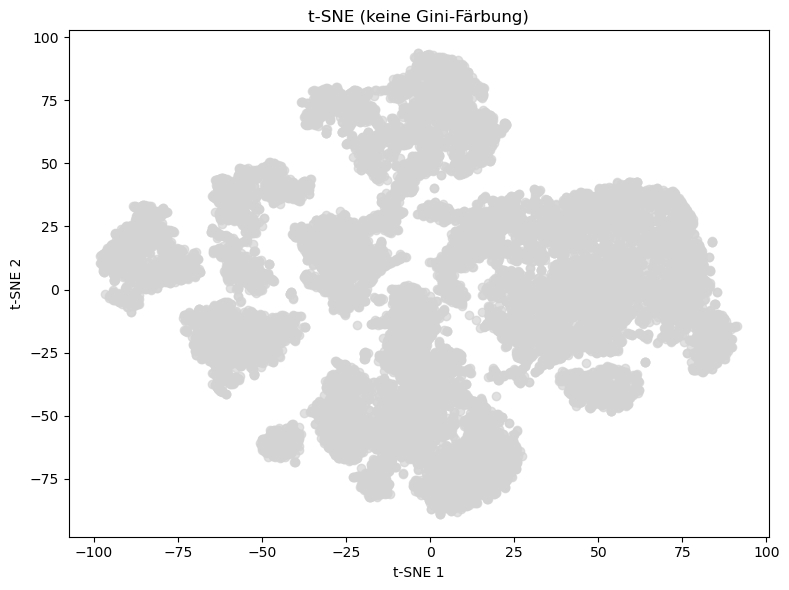

In [26]:
N = 20000
top_peaks_idx = ATAC_dis['variability'].sort_values(ascending=False).head(N).index
#top_peaks_matrix = ATAC_dis.loc[top_peaks_idx, :]

# 4. TSS-Distanz für diese Peaks holen (matching Index!)
tss_distances = ATAC_dis.loc[top_peaks_idx, 'distance_to_TSS'].values

# 5. tSNE anwenden
coords = functions.tSNE(ATAC_dis, score_cols_all, 25, 30, top_peaks_idx)[0]

(20000, 90)


/var/folders/hf/p924smkx04g4y9vl6kh5yy4r0000gn/T/ipykernel_98433/269199370.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Dominant Lineage', bbox_to_anchor=(1.05, 1), loc='upper left')


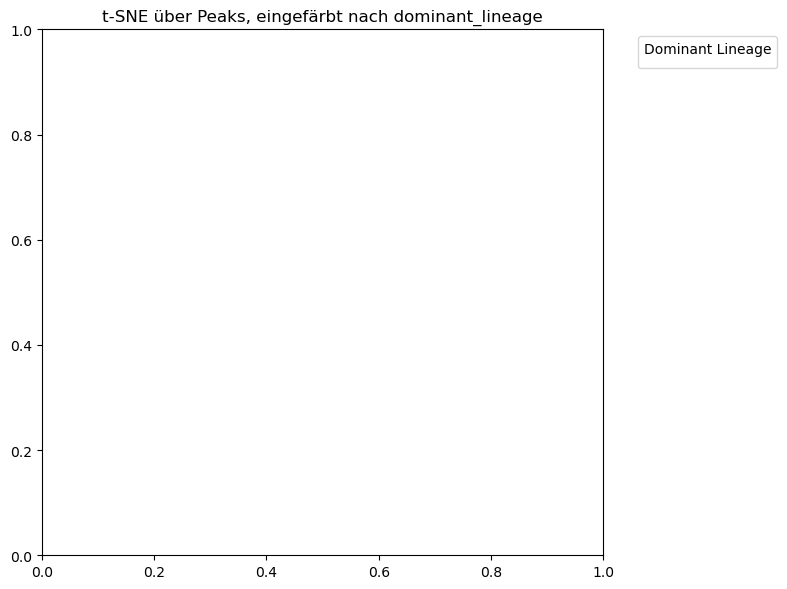

In [31]:
tsne_df = pd.DataFrame(coords, columns=['tsne_1', 'tsne_2'])
tsne_df['dominant_lineage'] = ATAC_dis.loc[top_peaks_idx, 'dominant_lineage'].values
print(ATAC_dis[score_cols_all].loc[top_peaks_idx].shape)

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=tsne_df,
    x='tsne_1', y='tsne_2',
    hue='dominant_lineage',
    palette='tab10',   # oder 'Set2', 'Dark2', etc.
    alpha=0.7,
    s=20    # Punktgröße
)
plt.title('t-SNE über Peaks, eingefärbt nach dominant_lineage')
plt.legend(title='Dominant Lineage', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

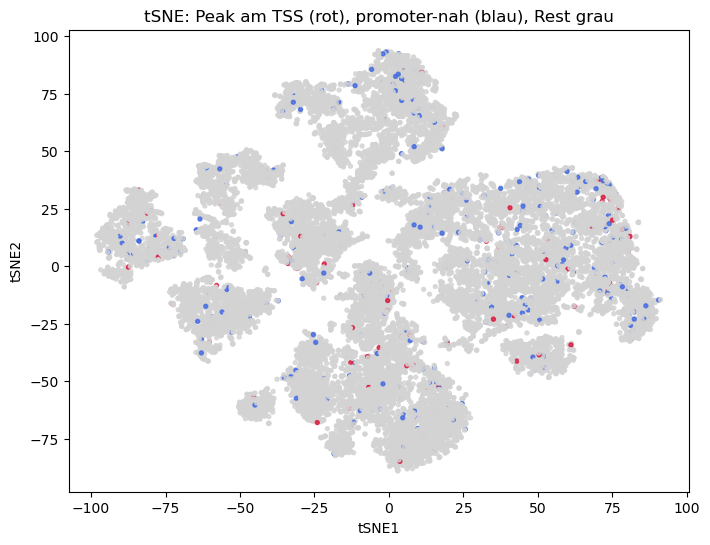

In [ ]:
tss_names = ATAC_dis.loc[coords.index, 'TSS']
colors = np.full_like(tss_distances, fill_value='lightgrey', dtype='object')

# ROT: Peak direkt am TSS (dort, wo 'TSS' NICHT NaN ist)
colors[~pd.isna(tss_names)] = 'crimson'

# BLAU: 0 < Distanz <= 2000, aber KEIN direkter TSS (also TSS ist NaN)
mask_blue = (tss_distances > 0) & (tss_distances <= 2000) & (pd.isna(tss_names))
colors[mask_blue] = 'royalblue'

plt.figure(figsize=(8,6))
plt.scatter(coords['tSNE1'], coords['tSNE2'], c=colors, s=8, alpha=0.8)
plt.xlabel('tSNE1')
plt.ylabel('tSNE2')
plt.title('tSNE: Peak am TSS (rot), promoter-nah (blau), Rest grau')
plt.show()

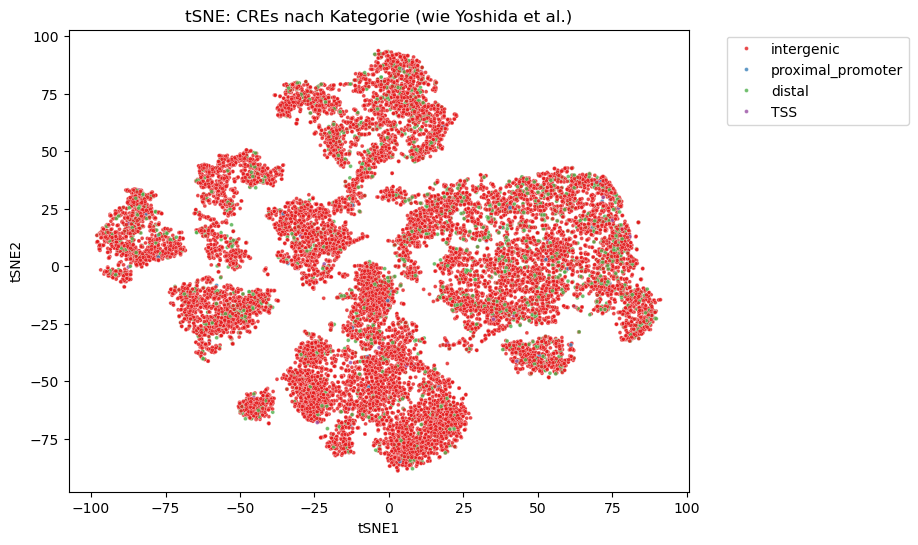

In [ ]:
bins = [
    (-np.inf, 0),         # direkt am/im TSS
    (0, 500),             # promoter-proximal
    (500, 2000),          # promoter-nah
    (2000, 10000),        # distal
    (10000, np.inf)       # weit weg
]
labels = ['TSS', 'proximal_promoter', 'promoter_near', 'distal', 'intergenic']

def cat(dist, tss):
    if not pd.isna(tss):
        if dist <= 0:
            return 'TSS'
        elif dist <= 500:
            return 'proximal_promoter'
        elif dist <= 2000:
            return 'promoter_near'
    if dist > 2000 and dist <= 10000:
        return 'distal'
    return 'intergenic'

categories = [cat(d, t) for d, t in zip(tss_distances, tss_names)]

plt.figure(figsize=(8,6))
sns.scatterplot(
    x=coords['tSNE1'], y=coords['tSNE2'],
    hue=categories, palette='Set1', s=8, alpha=0.8
)
plt.title('tSNE: CREs nach Kategorie (wie Yoshida et al.)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

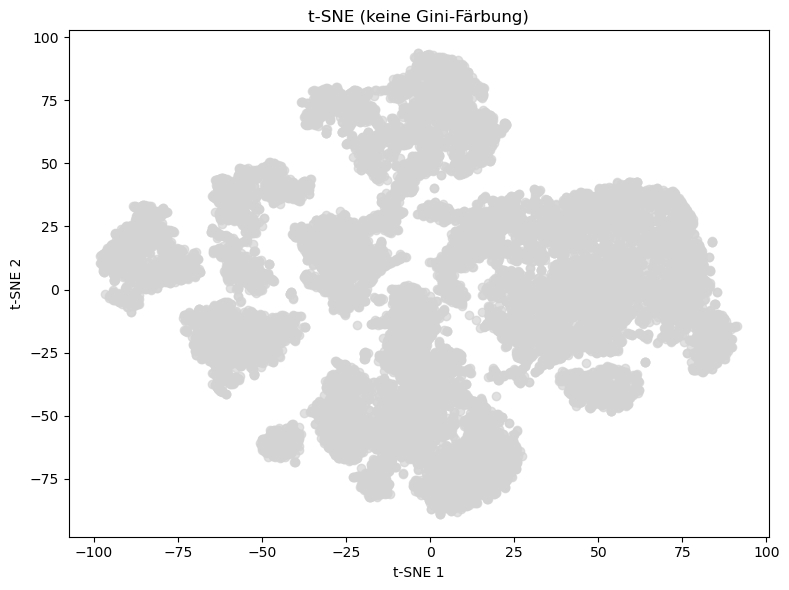

In [ ]:
ATAC_dis_prom1kb = ATAC_dis.copy()
ATAC_dis_prom1kb['region_type'] = np.where(ATAC_dis_prom1kb['distance_to_TSS'].abs() <= 1000, 'Promoter', 'Enhancer')
tsne_yosh, gini_score = functions.tSNE(ATAC_dis, score_cols_all, 25, 30, top_peaks_idx)

ValueError: 'c' argument has 90 elements, which is inconsistent with 'x' and 'y' with size 20000.

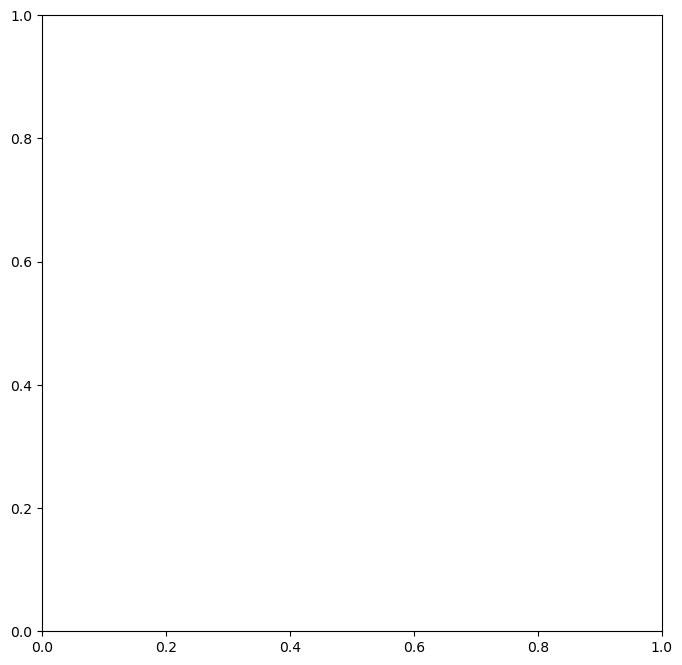

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(tsne_yosh['tSNE1'], tsne_yosh['tSNE2'], c=gini_score, cmap='Spectral', s=4)
plt.colorbar(label="Gini index\n(Cell-type specificity)")
plt.title('tSNE: CREs nach Gini-Index (Yoshida-Style)')
plt.xlabel('tSNE1')
plt.ylabel('tSNE2')
plt.show()